Lucky you! You’ve won two gift cards, each loaded with 50 free drinks from your favorite coffee shop, Riddler Caffei-Nation. The cards look identical, and because you’re not one for record-keeping, you randomly pick one of the cards to pay with each time you get a drink. One day, the clerk tells you that he can’t accept the card you presented to him because it doesn’t have any drink credits left on it.

What is the probability that the other card still has free drinks on it? How many free drinks can you expect are still available?

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
%matplotlib inline

from tqdm import tqdm

In [62]:
initial_value = 50
n_sim = int(1e2)
n_repeat = int(50)
wallet = {'card1':initial_value,'card2':initial_value}

In [63]:
df_repeat = []
for jj in range(n_repeat):
    results = []
    for ii in tqdm(range(n_sim)):
        wallet = {'card1':initial_value,'card2':initial_value}
        for _ in range(100):
            cards = ['card1','card2']
            np.random.shuffle(cards)
            card_pick = cards[np.random.choice([0,1])]
            wallet[card_pick] -= 1
            if (wallet['card1'] <= 0) or (wallet['card2'] <= 0):
                results.append(wallet)
                break
        results.append(wallet)
    df = {'card':[],'left':[]}
    for item in results:
        for key,value in item.items():
            if value > 0:
                df['card'].append(key)
                df['left'].append(value)
    df = pd.DataFrame(df)
    df['repeat'] = jj
    df_repeat.append(df)
df_repeat = pd.concat(df_repeat)

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 1250.76it/s]


In [64]:
df_repeat

,card,left,repeat
0,card2,6,0
1,card2,6,0
2,card1,7,0
3,card1,7,0
4,card2,2,0
5,card2,2,0
6,card1,7,0
7,card1,7,0
8,card2,28,0
9,card2,28,0


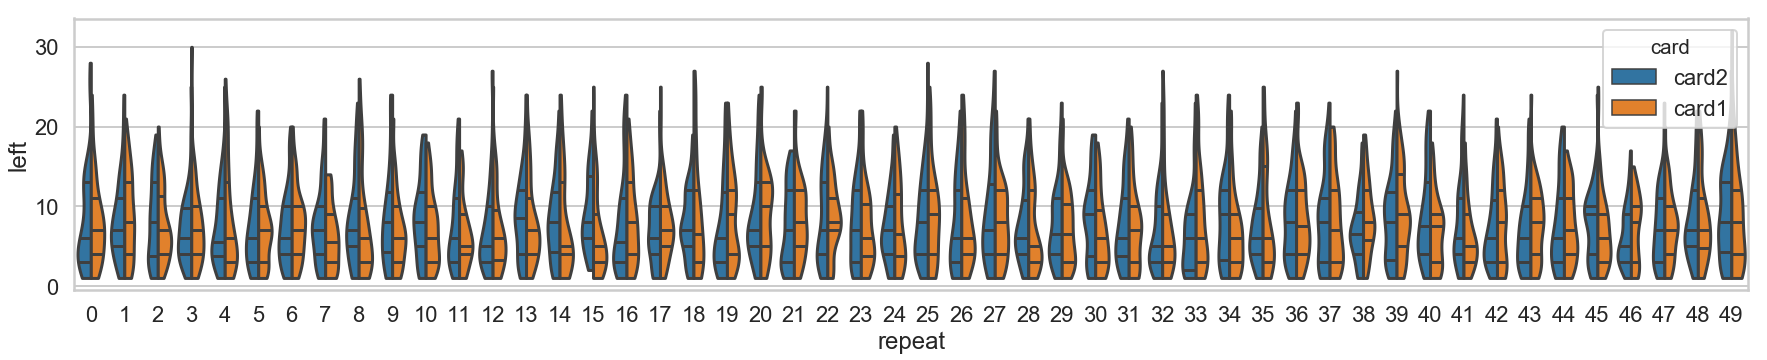

In [70]:
fig,ax = plt.subplots(figsize=(30,5))
sns.violinplot(x = 'repeat',y = 'left',hue = 'card',split = True,data = df_repeat,cut=0,inner='quartile',ax = ax)

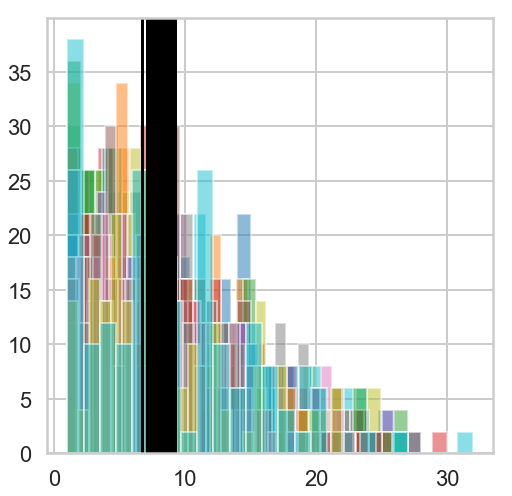

In [76]:
fig,ax = plt.subplots(figsize=(8,8))
for r,df_sub in df_repeat.groupby('repeat'):
    ax.hist(df_sub['left'],alpha = 0.5,bins = 25)
    ax.axvline(df_sub['left'].mean(),color='black')